<a href="https://colab.research.google.com/github/adrianosorio/MECPS_Final_Project_ML/blob/data_preprocessing_adrian/Metrics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [101]:
# ML Imports
import pandas as pd
import seaborn as sns
import numpy as np
import datetime

import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.models import load_model
tf.config.run_functions_eagerly(True)
tf.data.experimental.enable_debug_mode()

from matplotlib import pyplot as plt

from sklearn import metrics


In [76]:
# Data Processing/Loading

# Y data has been changed to start at 0-11

# Read in Train Data Set
train_data_x = pd.read_csv("HAPT/Train/X_train.txt", sep=" ", header=None)
train_data_y = pd.read_csv("HAPT/Train/y_train.txt", sep=" ", header=None, names = ["y"])
# Keep labels in range 0-11 translates to 1-12 if you add one
subbyone = np.ones((train_data_y.shape[0], 1))
train_data_y = np.subtract(train_data_y, subbyone)
train_data_y = train_data_y.astype(int)
print("Train data Y: ", train_data_y)

# Read in Test Data Set
test_data_x = pd.read_csv("HAPT/Test/X_test.txt", sep=" ", header=None)
test_data_y = pd.read_csv("HAPT/Test/y_test.txt", sep=" ", header=None, names = ["y"])
subbyone = np.ones((test_data_y.shape[0], 1))
test_data_y = np.subtract(test_data_y, subbyone)
test_data_y = test_data_y.astype(int)

combined_data_xy = pd.concat([train_data_x, train_data_y], axis=1, join='inner')
shuffled_data_xy = combined_data_xy.sample(frac=1, random_state=1).reset_index() # Randomization is reproducible right now

# Split Data Set Again
train_data_x = pd.DataFrame(shuffled_data_xy, columns=list(range(0,561)))
train_data_y = pd.DataFrame(shuffled_data_xy, columns=['y'])
combined_data1_xy = pd.concat([test_data_x, test_data_y], axis=1, join='inner')
shuffled_data1_xy = combined_data_xy.sample(frac=1, random_state=1).reset_index() # Randomization is reproducible right now

# Split Data Set Again
test_data_x = pd.DataFrame(shuffled_data1_xy, columns=list(range(0,561)))
test_data_y = pd.DataFrame(shuffled_data1_xy, columns=['y'])
print(train_data_x.head()) # Grabs first entry in the dataframe
print(train_data_y.head()) # Grabs first entry in the dataframe

# Formatting Data
train_data_x1 = train_data_x.values
train_data_x1 = train_data_x1.reshape(train_data_x1.shape[0], train_data_x1.shape[1], 1)

print(test_data_x)

Train data Y:        y
0     4
1     4
2     4
3     4
4     4
...  ..
7762  1
7763  1
7764  1
7765  1
7766  1

[7767 rows x 1 columns]
        0         1         2         3         4         5         6    \
0  0.053196 -0.003098 -0.010655 -0.403796 -0.402836 -0.425150 -0.475220   
1  0.037819 -0.003904 -0.015017 -0.994648 -0.997604 -0.995550 -0.995272   
2  0.040917 -0.002189 -0.015174 -0.992943 -0.982536 -0.951265 -0.993830   
3 -0.048778  0.138520  0.125655 -0.829078 -0.774498 -0.604445 -0.824706   
4  0.023531  0.021643 -0.017850 -0.197319 -0.205305 -0.472853 -0.283091   

        7         8         9    ...       551       552       553       554  \
0 -0.420628 -0.505352 -0.112246  ...  0.310320 -0.733347 -0.898479 -0.355769   
1 -0.998161 -0.996189 -0.800979  ...  0.550666 -0.765162 -0.935663 -0.094668   
2 -0.983548 -0.954652 -0.787094  ... -0.077928 -0.583060 -0.870028 -0.128582   
3 -0.757619 -0.631242 -0.755319  ... -0.133611 -0.313426 -0.678482  0.164486   
4 -0.290730 -

In [77]:

#def Model_1(): #Base model
model = models.Sequential()
model.add(layers.Conv1D(64, activation='tanh',  kernel_size=(3)))
model.add(layers.Conv1D(32, activation='tanh',  kernel_size=(3)))
model.add(layers.Flatten())
model.add( layers.Dense(64, activation="relu") )
model.add( layers.Dense(128, activation="sigmoid") )
model.add( layers.Dense(12, activation="sigmoid") )
 # return model
model.compile(optimizer=tf.keras.optimizers.SGD(), loss="sparse_categorical_crossentropy", metrics=["accuracy"])
print(train_data_x1.shape)
# validation_data=(test_data_x, test_data_y), validation_freq = 5

(7767, 561, 1)


In [79]:
epochs = 20 
bs = 20
# filepath = "model.{epoch:02d}.hdf5"
# validation_data=(test_data_x, test_data_y), validation_freq = 5
# Fit Model
history = model.fit(train_data_x1, train_data_y, epochs=epochs, verbose = 2, batch_size=bs)

Epoch 1/20
389/389 - 23s - loss: 1.2980 - accuracy: 0.5973 - 23s/epoch - 60ms/step
Epoch 2/20
389/389 - 22s - loss: 0.7076 - accuracy: 0.8008 - 22s/epoch - 57ms/step
Epoch 3/20
389/389 - 24s - loss: 0.4565 - accuracy: 0.8567 - 24s/epoch - 61ms/step
Epoch 4/20
389/389 - 23s - loss: 0.3476 - accuracy: 0.8839 - 23s/epoch - 59ms/step
Epoch 5/20
389/389 - 22s - loss: 0.2869 - accuracy: 0.9038 - 22s/epoch - 57ms/step
Epoch 6/20
389/389 - 22s - loss: 0.2497 - accuracy: 0.9119 - 22s/epoch - 57ms/step
Epoch 7/20
389/389 - 23s - loss: 0.2137 - accuracy: 0.9260 - 23s/epoch - 60ms/step
Epoch 8/20
389/389 - 23s - loss: 0.1914 - accuracy: 0.9345 - 23s/epoch - 59ms/step
Epoch 9/20
389/389 - 22s - loss: 0.1692 - accuracy: 0.9417 - 22s/epoch - 56ms/step
Epoch 10/20
389/389 - 22s - loss: 0.1600 - accuracy: 0.9443 - 22s/epoch - 56ms/step
Epoch 11/20
389/389 - 22s - loss: 0.1473 - accuracy: 0.9488 - 22s/epoch - 57ms/step
Epoch 12/20
389/389 - 22s - loss: 0.1335 - accuracy: 0.9562 - 22s/epoch - 57ms/step
E

In [80]:
test_loss, test_acc = model.evaluate(test_data_x,  test_data_y, verbose=2)

243/243 - 7s - loss: 0.0844 - accuracy: 0.9728 - 7s/epoch - 28ms/step


In [83]:
# Save Model and history:
now = datetime.datetime.now()

model_name = "trained_model_" + now.strftime("%A_%b_%H_%p_%M_%S") + ".h5"
model.save(model_name)
print("Model has been saved as ", model_name)
history_file_name = "model_history_" + now.strftime("%A_%b_%H_%p_%M_%S") + ".npy"
print(history.history)
np.save(history_file_name, history.history)
print("Model History has been saved as ", history_file_name)

Model has been saved as  trained_model_Thursday_Dec_20_PM_18_57.h5
{'loss': [1.2979776859283447, 0.7076451182365417, 0.4565187990665436, 0.34762316942214966, 0.28686729073524475, 0.24967487156391144, 0.21370282769203186, 0.1913553923368454, 0.16920357942581177, 0.15997610986232758, 0.14729340374469757, 0.13351765275001526, 0.12903474271297455, 0.12087235599756241, 0.11151648312807083, 0.10664059966802597, 0.10114023089408875, 0.10037125647068024, 0.09283295273780823, 0.0892268717288971], 'accuracy': [0.5972704887390137, 0.800823986530304, 0.8567014336585999, 0.883867621421814, 0.9038238525390625, 0.9119350910186768, 0.9259688258171082, 0.9344663023948669, 0.9416763186454773, 0.944251298904419, 0.9487575888633728, 0.9562250375747681, 0.9551950693130493, 0.959186315536499, 0.9630488157272339, 0.9624050259590149, 0.9656237959861755, 0.9644650220870972, 0.9696150422096252, 0.9707738161087036]}
Model History has been saved as  model_history_Thursday_Dec_20_PM_18_57.npy


In [84]:
load_model_file_name = "trained_model_Thursday_Dec_20_PM_18_57.h5" # trained_model_1669911911.7536962.h5
load_history_file_name = "model_history_Thursday_Dec_20_PM_18_57.npy" # 
loaded_model = None
loaded_history = None
if not (load_model_file_name == None):
  loaded_model = load_model(load_model_file_name)
  loaded_model.summary()
  loaded_history = np.load(load_history_file_name, allow_pickle='true').item()
  print(loaded_history)


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_4 (Conv1D)           (None, 559, 64)           256       
                                                                 
 conv1d_5 (Conv1D)           (None, 557, 32)           6176      
                                                                 
 flatten_2 (Flatten)         (None, 17824)             0         
                                                                 
 dense_6 (Dense)             (None, 64)                1140800   
                                                                 
 dense_7 (Dense)             (None, 128)               8320      
                                                                 
 dense_8 (Dense)             (None, 12)                1548      
                                                                 
Total params: 1,157,100
Trainable params: 1,157,100
No

In [85]:
# Plotting of Metrics
# Plot Loss
x_axis_epochs = [i for i in range(1, 21)] # TODO incorporate validation loss
plt.plot(x_axis_epochs, loaded_history['loss'], color="red", marker='o', linewidth=2, markersize=4)
plt.title("CNN Model Training Loss over Epochs")
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(["train"], loc = 'upper right')
fig_name = load_model_file_name + "_Loss.png"
plt.savefig(fig_name)
plt.cla()
plt.clf()
# Plot Accuracy
plt.plot(x_axis_epochs, loaded_history['accuracy'], color="green", marker='o', linewidth=2, markersize=4)
plt.title("CNN Model Training Accuracy over Epochs")
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(["train"], loc = 'upper left')
fig_name = load_model_file_name + "_Acc.png"
plt.savefig(fig_name)
plt.cla()
plt.clf()

<Figure size 432x288 with 0 Axes>

In [86]:
# Confusion Matrix Generation
predictions = loaded_model.predict(test_data_x)

243/243 [==============================] - 7s 28ms/step


(7767, 1)
(7767, 1)
      y
0     1
1     5
2     3
3     3
4     0
...  ..
7762  4
7763  3
7764  2
7765  5
7766  2

[7767 rows x 1 columns]
[0.68566924 0.9998313  0.69067985 0.01917299 0.16019629 0.05111301
 0.7466633  0.35011497 0.50317377 0.48395425 0.6134105  0.28518915]
[[1.]
 [5.]
 [3.]
 ...
 [2.]
 [5.]
 [2.]]


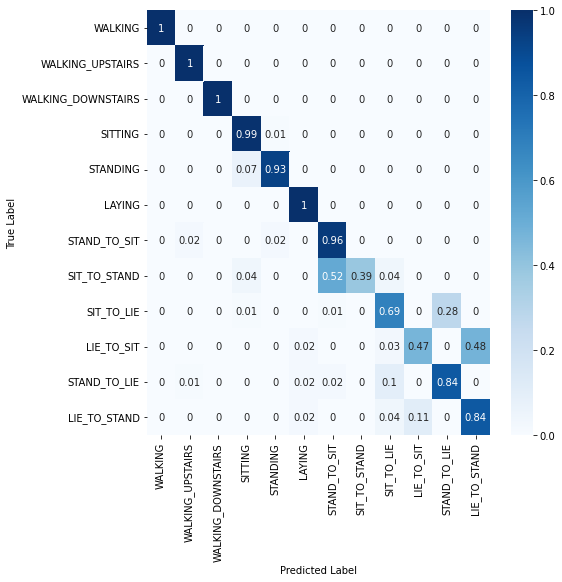

In [105]:
print(test_data_y.shape)
print(test_data_y.shape)
print(test_data_y)
pred_classes = np.zeros((predictions.shape[0], 1))
print(predictions[0])
for entry in range(test_data_y.shape[0]):
  pred_classes[entry] = np.argmax(predictions[entry,:])
pred_classes = pred_classes
print(pred_classes)
conf_matrix = metrics.confusion_matrix(test_data_y, pred_classes)
confusion_matrix_normalize = np.around(conf_matrix.astype('float')/conf_matrix.sum(axis=1)[:,np.newaxis],decimals=2)
classes = ["WALKING", "WALKING_UPSTAIRS", "WALKING_DOWNSTAIRS", "SITTING"
          ,"STANDING", "LAYING", "STAND_TO_SIT", "SIT_TO_STAND", "SIT_TO_LIE", 
           "LIE_TO_SIT", "STAND_TO_LIE", "LIE_TO_STAND"]
conf_mat_df = pd.DataFrame(confusion_matrix_normalize, index = classes, columns = classes)
figure = plt.figure(figsize=(8,8))
sns.heatmap(conf_mat_df, annot=True, cmap=plt.cm.Blues)
plt.tight_layout()
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
fig_name = load_model_file_name + "_Conf_Matrix.png"
plt.savefig(fig_name)
plt.cla()
plt.clf()


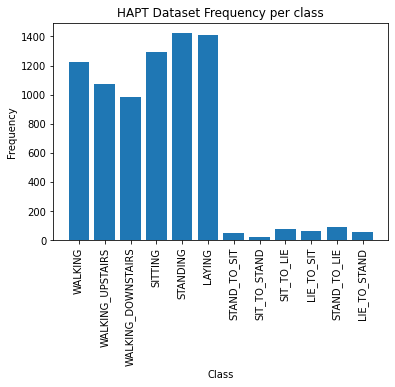

In [110]:
unique, frequency = np.unique(train_data_y, return_counts = True)
plt.bar(classes, frequency)
plt.xticks(ticks=range(len(classes)), labels=classes, rotation=90)
plt.title("HAPT Dataset Frequency per class")
plt.ylabel('Frequency')
plt.xlabel('Class')
fig_name = load_model_file_name + "_Frequency.png"
plt.savefig(fig_name)
#plt.cla()
#plt.clf()